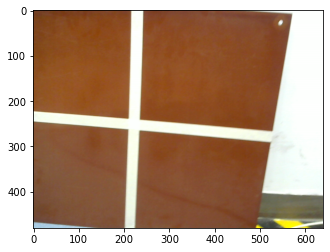

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#读入图片，模式为灰度图，创建窗口
scr = cv2.imread("Picture.png")
 
rgb = scr[...,::-1]
plt.imshow(rgb)

In [2]:
# 轉換BGR到HSV
imgHSV = cv2.cvtColor(scr, cv2.COLOR_BGR2HSV)

# range of white color in L channel L通道白色範圍
# mask = cv2.inRange(imgHSV[:,:,1], lower=250, upper=255) 0 70 51  20 255 255
mask = cv2.inRange(imgHSV, np.array([0,0,0]), np.array([30, 255, 255]))
scr_2 = scr.copy()
# Apply Mask to original image 將蒙版應用到原始圖像
white_mask = cv2.bitwise_and(scr_2,scr_2, mask=mask)

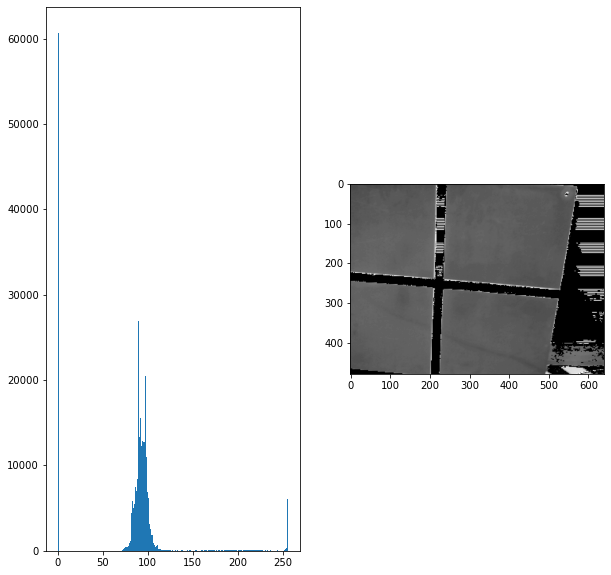

In [3]:
gray = cv2.cvtColor(white_mask,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.hist(gray.ravel(), 256, [0,256])
plt.subplot(1,2,2)
plt.imshow(gray, cmap="gray")


plt.show()

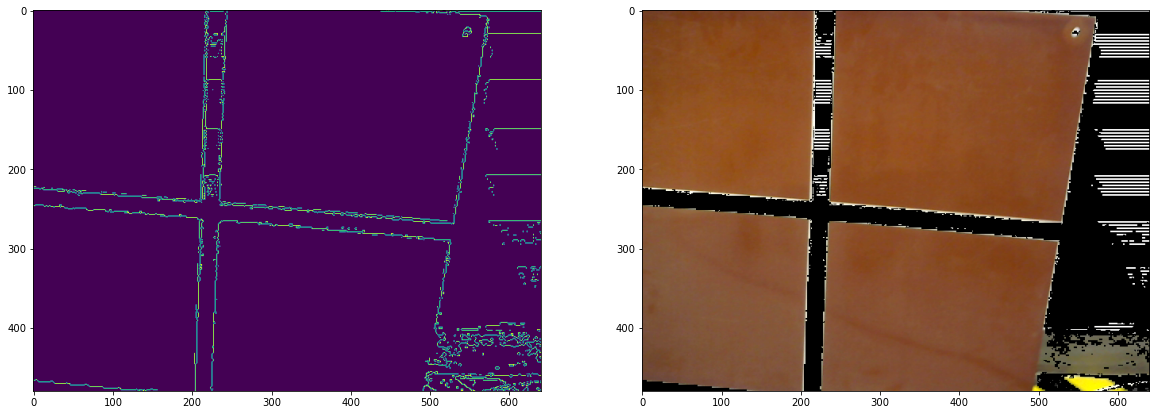

In [22]:
img = cv2.GaussianBlur(gray,(3,3),0)
edges_w = cv2.Canny(white_mask, 40, 140, apertureSize = 3)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(edges_w)
plt.subplot(1,2,2)
rgb = white_mask[...,::-1]
plt.imshow(rgb)
plt.show()

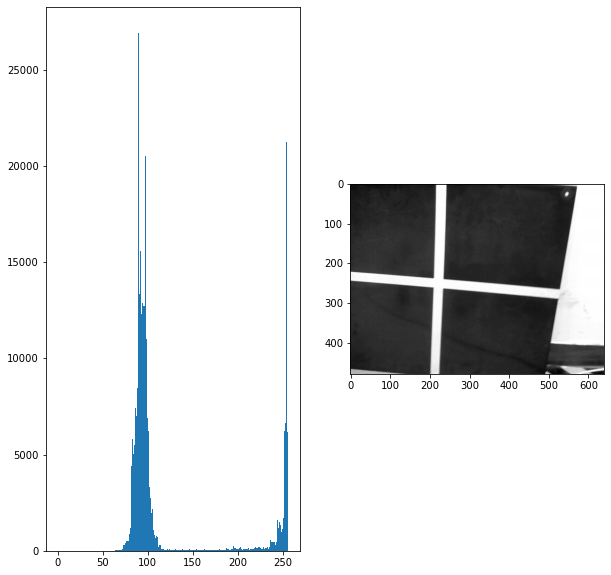

In [5]:
gray = cv2.cvtColor(scr,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.hist(gray.ravel(), 256, [0,256])
plt.subplot(1,2,2)
plt.imshow(gray, cmap="gray")
plt.show()

(480, 640)


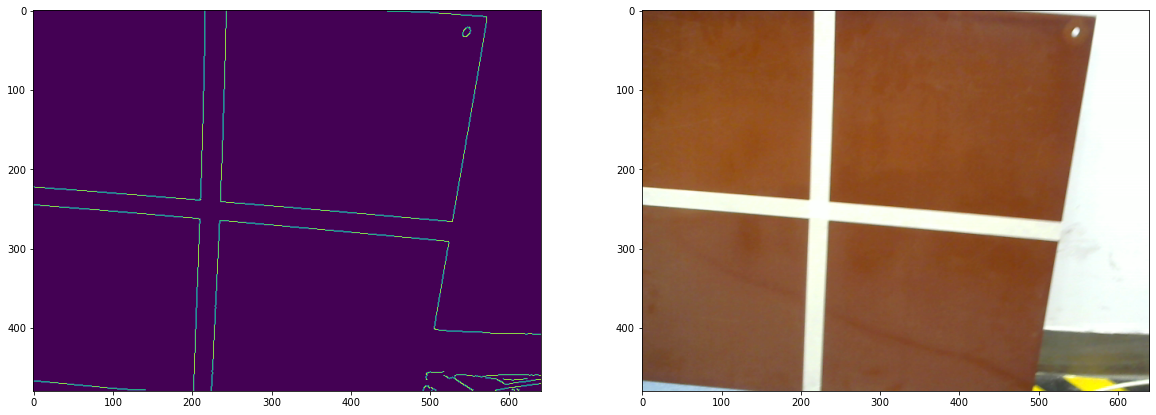

In [6]:
gray = cv2.cvtColor(scr,cv2.COLOR_BGR2GRAY)

img = cv2.GaussianBlur(gray,(3,3),0)
edges = cv2.Canny(img, 40, 140, apertureSize = 3)


print(gray.shape)


plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(edges)
plt.subplot(1,2,2)
rgb = scr[...,::-1]
plt.imshow(rgb)

plt.show()

( -1017 , 154 )  ( 975 , 329 )
0.08785140562248996
( -1015 , 131 )  ( 977 , 305 )
0.08734939759036145
( 182 , 1006 )  ( 252 , -991 )
28.52857142857143
( 208 , 1007 )  ( 278 , -990 )
28.52857142857143
( 383 , 1083 )  ( 731 , -886 )
5.658045977011494
[[[2.4300000e+02 1.6580628e+00]]

 [[2.1900000e+02 1.6580628e+00]]

 [[2.1800000e+02 3.4906585e-02]]

 [[2.4400000e+02 3.4906585e-02]]

 [[5.6600000e+02 1.7453292e-01]]]
(480, 640, 3)


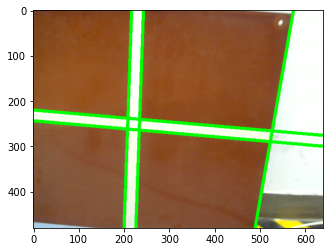

In [7]:
import itertools as it
tempIamge = scr.copy()
lines = cv2.HoughLines(edges,1,np.pi/180,150)
lines_data =np.empty([0,8])
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        #把直线显示在图片上
        cv2.line(tempIamge,(x1,y1),(x2,y2),(0,255,0),5)
        print("(",x1,",",y1,") ",'(',x2,",",y2,')')
        if(x2-x1 != 0):
            slope = abs((y2-y1)/(x2-x1))
            
            a = np.array([(x1,x2,y1,y2,slope,0,rho,theta)])
            lines_data = np.append(lines_data,a, axis=0)
            print(slope)
        else:
            slope = 0
            a = np.array([(x1,x2,y1,y2,slope,1,rho,theta)])
            lines_data = np.append(lines_data,a, axis=0)
        
print(lines)
print(tempIamge.shape)
rgb = tempIamge[...,::-1]
plt.imshow(rgb)

In [8]:
lines_data[0][7]

1.6580628156661987

In [9]:
for i in range(len(lines_data)):
    print(lines_data[i][4])

0.08785140562248996
0.08734939759036145
28.52857142857143
28.52857142857143
5.658045977011494


In [10]:
parallel =np.empty([0,2], dtype = int)
for i in range(len(lines_data)):
    for j in range(i+1,len(lines_data)):
        if((abs(lines_data[i][4]-lines_data[j][4])<0.01)and(lines_data[i][5]!=1)):
            print([i,j])
            a = np.array([(i,j)])
            parallel = np.append(parallel,a, axis=0)
        elif(lines_data[i][5] == 1):
            print(" the line is Vertical line")
            break

[0, 1]
[2, 3]


In [11]:
parallel_slope = np.zeros(2)
for i in range(len(parallel)):
    slope = (lines_data[parallel[i][0]][4]+lines_data[parallel[i][1]][4])/2
    parallel_slope[i] = slope
    
parallel_slope#parallel[0][0]]

array([ 0.0876004 , 28.52857143])

In [12]:
habe = []
for i in range(len(parallel)):
    for j in range(len(parallel[:])):
        habe.append(parallel[i][j])

In [13]:
horLine = []
verLine = []
for i in range(len(habe)):
    if((lines_data[habe[i]][7]>(0-0.1))&(lines_data[habe[i]][7]<(0+0.1))):
        horLine.append(lines_data[habe[i]])
    else:
        verLine.append(lines_data[habe[i]])

In [14]:
points = []
for l1 in horLine:
    for l2 in verLine:
        a = np.array([
            [np.cos(l1[7]), np.sin(l1[7])],
            [np.cos(l2[7]), np.sin(l2[7])]
        ])
        b = np.array([l1[6],l2[6]])
        points.append(np.linalg.solve(a, b))

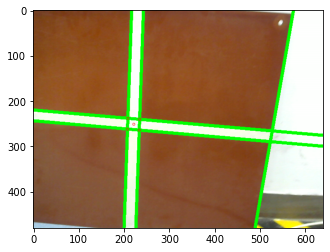

In [15]:
for point in points:
    cv2.circle(tempIamge, (int(point[0]),int(point[1])), 3, (0,0,255))
midx = np.mean([point[0] for point in points])
midy = np.mean([point[1] for point in points])
cv2.circle(tempIamge, (int(midx), int(midy)), 3, (0,0,255))
plt.figure()
rgb = tempIamge[...,::-1]
plt.imshow(rgb)
plt.show()

In [16]:
import sympy   # 引入解方程的专业模块sympy
imy = int(midy)
imx = int(midx)
x = sympy.symbols("x")   # 申明未知数"x"
y = (500-imy)
k=parallel_slope[1]
#a = sympy.solve([(y+k*imx)/(k*x)],[x])   # 写入需要解的方程体
x_wei=(y+k*imx)/(k)
#x_wei = abs(int(a[x]))
x_wei = int(x_wei)
print(x_wei)
print(y+k*imx)
#print(x_wei,parallel_slope[1],v,imy,imx,linet.shape)

230
6582.342857142857


In [17]:
# from fractions import Fraction
# c=Fraction(0.0876)
# print(
# print(c.numerator))


In [18]:
# from fractions import Fraction
# c=str(Fraction(0.0876))
# print(c)
# c_wei=c.find('/')
# x_zhi = c[0:c_wei]

# y_zhi= c[c_wei+1:]

# print()

In [19]:
# if x_zhi > y_zhi:
#     smaller = int(y_zhi)
# else:
#     smaller = int(x_zhi)

# for i in range(1,smaller + 1):
#     if((x % i == 0) and (y % i == 0)):
#         hcf = i
        
# print(hcf)

222 251


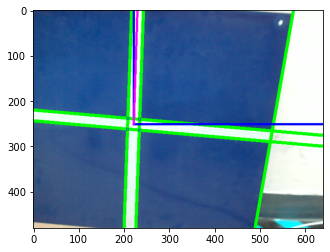

In [20]:
imy = int(midy)
imx = int(midx)
linet=tempIamge.copy()
cv2.line(linet,(imx,0),(imx,imy),(0,0,255),3)

cv2.line(linet,(1000,imy),(imx,imy),(0,0,255),3)

cv2.line(linet,(230,0),(imx,imy),(255,0,255),3)
print(imx,imy)

plt.imshow(linet)
plt.show()

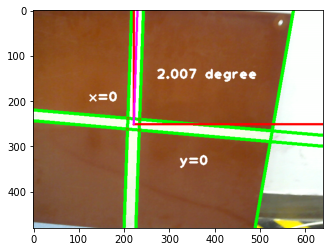

In [21]:
import math
linet2=linet.copy()
angle = 90-math.degrees(math.atan(parallel_slope[1]))

cv2.putText(linet2,str(angle)[0:5]+' degree',(imx+50,imy-100), cv2.FONT_HERSHEY_PLAIN, 2,(255,255,255),4)
cv2.putText(linet2,'y=0',(imx+100,imy+90), cv2.FONT_HERSHEY_PLAIN, 2,(255,255,255),4)
cv2.putText(linet2,'x=0',(imx-100,imy-50), cv2.FONT_HERSHEY_PLAIN, 2,(255,255,255),4)
rgb = linet2[...,::-1]
plt.imshow(rgb)

plt.show()